In [ ]:
#
# Author: Manny Alvarez
#
# Network and Complexity 
# 
# Downey Chapter 3 Exercises 
# 
#

In [10]:
### Packages 
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from utils import decorate, savefig

# Set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

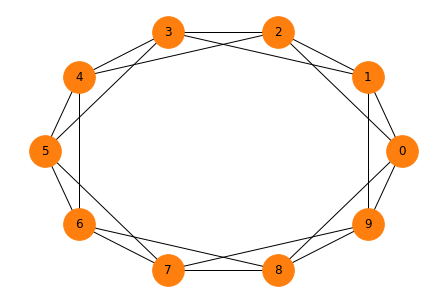

In [33]:
######### 3.1 #########

'''

Exercise 3.1 In a ring lattice, every node has the same number of neighbors.
The number of neighbors is called the degree of the node, and a graph where
all nodes have the same degree is called a regular graph.
All ring lattices are regular, but not all regular graphs are ring lattices. In
particular, if k is odd, we can’t construct a ring lattice, but we might be able
to construct a regular graph.
Write a function called make_regular_graph that takes n and k and returns
a regular graph that contains n nodes, where every node has k neighbors. If
it’s not possible to make a regular graph with the given values of n and k, the
function should raise a ValueError.
'''

'''
When creating a graph, we intitially used the following function in the text to enumerate the edges in a cicle that is conenct the nearest neighbor 
'''

def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v
'''
Following however, if these nodes do not have equal edges, then it wouldn't be a lattice structure.
So to do that, I wasn't to sure. I understood that I needed to connect edges between nodes.

'''

'''
I found that, we needed to have a graph where all the nodes have the same number of neighbors, however, this wouldn't work if both were odd
'''

### Code from solution to try 

def opposite_edges(nodes):
    """Enumerates edges that connect opposite nodes."""
    n = len(nodes)
    for i, u in enumerate(nodes):
        j = i + n//2
        v = nodes[j % n]
        yield u, 

def make_regular_graph(n, k):
    """Makes graph with `n` nodes where all nodes have `k` neighbors.
    
    Not possible if both `n` and `k` are odd.
    """
    # a is the number of adjacent edges
    # b is the number of opposite edges (0 or 1)
    a, b = divmod(k, 2)
    
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, a))
    
    # if k is odd, add opposite edges
    if b:
        if n%2:
            msg = "Can't make a regular graph if n and k are odd."
            raise ValueError(msg)
        G.add_edges_from(opposite_edges(nodes))
    return G


### Trying a graph from the code 


testinggraph =  make_regular_graph(10, 4)
nx.draw_circular(testinggraph, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)

In [23]:
######### 3.2 #########
'''
My implementation of reachable_nodes_bfs is efficient in
the sense that it is in O(n + m), but it incurs a lot of overhead adding
nodes to the queue and removing them. NetworkX provides a simple, fast
implementation of BFS, available from the NetworkX repository on GitHub
at http://thinkcomplex.com/connx.
Here is a version I modified to return a set of n
'''
def plain_bfs(G, start):
    seen = set()
    nextlevel = {start}
    while nextlevel:
        thislevel = nextlevel
        nextlevel = set()
        for v in thislevel:
            if v not in seen:
                seen.add(v)
                nextlevel.update(G[v])
    return seen
'''
Compare this function to reachable_nodes_bfs and see which is faster. Then
see if you can modify this function to implement a faster version of shortest_path_dijkstra.
'''

## Author's reachable nodes function from main text 

from collections import deque

def reachable_nodes_bfs(G, start):
    seen = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in seen:
            seen.add(node)
            queue.extend(G.neighbors(node))
    return seen

## Author's function from text from main text to make a enumerate edges 
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
    yield u, v


## Author's function from text from main text to make a lattice graph

def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

## make some testing graph 

graphed = make_ring_lattice(250, 2)

## see which one is faster using time it function 

import timeit

timeit(len(reachable_nodes_bfs(graphed, 0))) 


TypeError: 'module' object is not callable

In [ ]:
'''
Got to this point and then had to try the answer as the code kept failing. Found that I needed to import an additional module that still would not run (deque')
Ultimately learned that the selusions from Newtorkx is a faster algorith to search.

Additionally by applying the Dijkstra's algorithm, this version is also sifnificantly faster.

'''

In [ ]:
######### 3.3 #########

''''
The following implementation of BFS contains two performance errors. What are they? What is the actual order of growth for this
algorithm?
'''
def bfs(G, start):
    visited = set()
    queue = [start]
        while len(queue):
            curr_node = queue.pop(0) # Dequeue
            visited.add(curr_node)
            # Enqueue non-visited and non-enqueued children
            
            queue.extend(c for c in G[curr_node]
                if c not in visited and c not in queue)
        return visited

'''

This took a little digging and finding out that this was meant to be a timing exercise. Not coding. Ultimately, this when back to the big 'O' issue where adding certain function increased the computing time. 
In this case it included:  pop(0) -- the first index; and a checking que. So this would effectively go through the entire given list which is incredibly slow and taxing. 
'''


In [34]:
######### 3.4 #########

'''
In Section 3.10, I claimed that Dijkstra’s algorithm does not
work unless it uses BFS. Write a version of shortest_path_dijkstra that
uses DFS and test it on a few examples to see what goes wrong.
'''

### From the text, Dijkstra's algoritghm that uses BFS

def shortest_path_dijkstra(G, source):
    dist = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.popleft()
        new_dist = dist[node] + 1
        
        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
        
        queue.extend(neighbors)
    return dist


''' 
Had a few issues trying to "break the code", as in where to change the function. Going back to the text, I found that the initial function give each node a distance of one (this continues to 2, 3, and so on). Therefore, 
when we go to process each level, we would essentially give the neighbor distance+1...

'''
